### This is the data of Product Shipment Tracking. I want to discover key insights from their customer database. I want to use some of the most advanced machine learning techniques to study their customers. 

### There are two main questions to ask when we work on this dataset:

+ What was Customer Rating? And What criteria that the product will be delivered on time?
+ If Product importance is high. having higest rating or being delivered on time?

#### Data Source:
https://www.kaggle.com/prachi13/customer-analytics

# A. Importing Library dan dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("Train.csv")
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [3]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### The dataset used for model building contained 10999 observations of 12 variables.

### The data contains the following information:

+ ID: ID Number of Customers.
+ Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
+ Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
+ Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
+ Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
+ Cost of the product: Cost of the Product in US Dollars.
+ Prior purchases: The Number of Prior Purchase.
+ Product importance: The company has categorized the product in the various parameter such as low, medium, high.
+ Gender: Male and Female.
+ Discount offered: Discount offered on that specific product.
+ Weight in gms: It is the weight in grams.
+ Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# B. Data Cleaning

## 1. Missing Value Handling

In [4]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### There is no missing value in our data

## 2. Additional Feature

### I will add another discount feature (in percentage rather than in price)

In [5]:
df['Discount_offered_%']=100*df['Discount_offered']/df['Cost_of_the_Product']

In [6]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Discount_offered_%  
0                44           1233                    1           24.858757  
1                59           3088                    1           27.314815  
2                48           3374                    1           26.229508  
3                10           1177                    1            5.681818  
4                46           2484                    1           25.000000

## 3. Label Encoding (For EDA)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
comm= df.copy()
for col in comm.select_dtypes(include='O').columns:
    comm[col]=le.fit_transform(comm[col])

In [9]:
comm.head()

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                    4   
1   2                4                 0                    4   
2   3                0                 0                    2   
3   4                1                 0                    3   
4   5                2                 0                    2   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0                2                  177                3                   1   
1                5                  216                2                   1   
2                2                  183                4                   1   
3                3                  176                4                   2   
4                2                  184                3                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0       0                44           1233                    1   
1       1                59           3088                    1   
2       1                48           3374                    1   
3       1                10           1177                    1   
4       0                46           2484                    1   

   Discount_offered_%  
0           24.858757  
1           27.314815  
2           26.229508  
3            5.681818  
4           25.000000

# C. Exploratory Data Analysis

## 1. Statistics Descriptive

In [10]:
def summary(df,column):
    print("Distinct : ",len(pd.unique(df[column])))
    print("Missing : ",df[column].isnull().sum())
    print("Sum : ",df[column].sum())
    print("Mode : ",st.mode(df[column]))
    print("stddev : ",np.std(df[column]))
    print("CV :",100*(np.std(df[column]))/(np.mean(df[column]))) #coefficient of variation
    print("Min : ",df[column].min())
    print("Max : ",df[column].max())
    print("Mean : ",df[column].mean())
    print("Q1 : ",np.quantile(df[column],0.25))
    print("Q1 : ",np.quantile(df[column],0.5))
    print("Q1 : ",np.quantile(df[column],0.75))
    
    
def values(df,column):
    for i in df[column].unique():
        print(i)


def values_df(df):
    for i in df.columns:
        print(i)
        for j in df[i].unique():
            print(j)
        print("-"*20)
        
def proportion(df,column):
    for i in df[column].unique():
        counts = (sum(df[column]==i)/df[column].count()) *100
        print (i,' dengan proporsi {}%'.format(counts))

#### Let's see a brief statistical description of the data

In [11]:
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
count     10999.000000      10999.000000   10999.000000         10999.000000   
mean          3.567597         13.373216    3634.016729             0.596691   
std           1.522860         16.205527    1635.377251             0.490584   
min           2.000000          1.000000    1001.000000             0.000000   
25%           3.000000          4.000000    1839.500000             0.000000   
50%           3.000000          7.000000    4149.000000             1.000000   
75%           4.000000         10.000000    5050.000000             1.000000   
max          10.000000         65.000000    7846.000000             1.000000   

       Discount_offered_%  
count        10999.000000  
mean             7.023666  
std              9.268773  
min              0.322581  
25%              1.754386  
50%              3.333333  
75%              6.296459  
max             63.636364

#### Or it can be seen from the encoded data:

In [12]:
comm.describe()

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
count  10999.00000     10999.000000      10999.000000         10999.000000   
mean    5500.00000         2.333394          1.516865             4.054459   
std     3175.28214         1.490726          0.756894             1.141490   
min        1.00000         0.000000          0.000000             2.000000   
25%     2750.50000         1.000000          1.000000             3.000000   
50%     5500.00000         3.000000          2.000000             4.000000   
75%     8249.50000         4.000000          2.000000             5.000000   
max    10999.00000         4.000000          2.000000             7.000000   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
count     10999.000000         10999.000000     10999.000000   
mean          2.990545           210.196836         3.567597   
std           1.413603            48.063272         1.522860   
min           1.000000            96.000000         2.000000   
25%           2.000000           169.000000         3.000000   
50%           3.000000           214.000000         3.000000   
75%           4.000000           251.000000         4.000000   
max           5.000000           310.000000        10.000000   

       Product_importance        Gender  Discount_offered  Weight_in_gms  \
count        10999.000000  10999.000000      10999.000000   10999.000000   
mean             1.346031      0.495863         13.373216    3634.016729   
std              0.631434      0.500006         16.205527    1635.377251   
min              0.000000      0.000000          1.000000    1001.000000   
25%              1.000000      0.000000          4.000000    1839.500000   
50%              1.000000      0.000000          7.000000    4149.000000   
75%              2.000000      1.000000         10.000000    5050.000000   
max              2.000000      1.000000         65.000000    7846.000000   

       Reached.on.Time_Y.N  Discount_offered_%  
count         10999.000000        10999.000000  
mean              0.596691            7.023666  
std               0.490584            9.268773  
min               0.000000            0.322581  
25%               0.000000            1.754386  
50%               1.000000            3.333333  
75%               1.000000            6.296459  
max               1.000000           63.636364

In [13]:
for i in comm.columns:
    print (i,'\n')
    summary(comm,i)
    print("-"*30)

ID 

Distinct :  10999
Missing :  0
Sum :  60494500
Mode :  1
stddev :  3175.1377922855568
CV : 57.729778041555576
Min :  1
Max :  10999
Mean :  5500.0
Q1 :  2750.5
Q1 :  5500.0
Q1 :  8249.5
------------------------------
Warehouse_block 

Distinct :  5
Missing :  0
Sum :  25665
Mode :  4
stddev :  1.4906577701448205
CV : 63.88367353915013
Min :  0
Max :  4
Mean :  2.333393944904082
Q1 :  1.0
Q1 :  3.0
Q1 :  4.0
------------------------------
Mode_of_Shipment 

Distinct :  3
Missing :  0
Sum :  16684
Mode :  2
stddev :  0.7568592007221914
CV : 49.89627396753406
Min :  0
Max :  2
Mean :  1.5168651695608693
Q1 :  1.0
Q1 :  2.0
Q1 :  2.0
------------------------------
Customer_care_calls 

Distinct :  6
Missing :  0
Sum :  44595
Mode :  4
stddev :  1.1414377553154325
CV : 28.152649110246532
Min :  2
Max :  7
Mean :  4.054459496317847
Q1 :  3.0
Q1 :  4.0
Q1 :  5.0
------------------------------
Customer_rating 

Distinct :  5
Missing :  0
Sum :  32893
Mode :  3
stddev :  1.4135389093311594

## 2. Imbalanced Dataset Checking (Checking Target Class Proportion)

### We see our target value distribution

In [14]:
proportion(comm,'Reached.on.Time_Y.N')

1  dengan proporsi 59.66906082371125%
0  dengan proporsi 40.33093917628875%


### It can be seen that the proportion or amount of data for each target class that we have is not too much different in number, so it is actually enough to avoid the problem of imbalanced datasets. But for the sake of perfection, i will add smote algorithm to handle this little imbalance.

# D. Data Visualization

## 1. Correlation Between Features In Data

### Let's see the heatmap correlation in the initial data

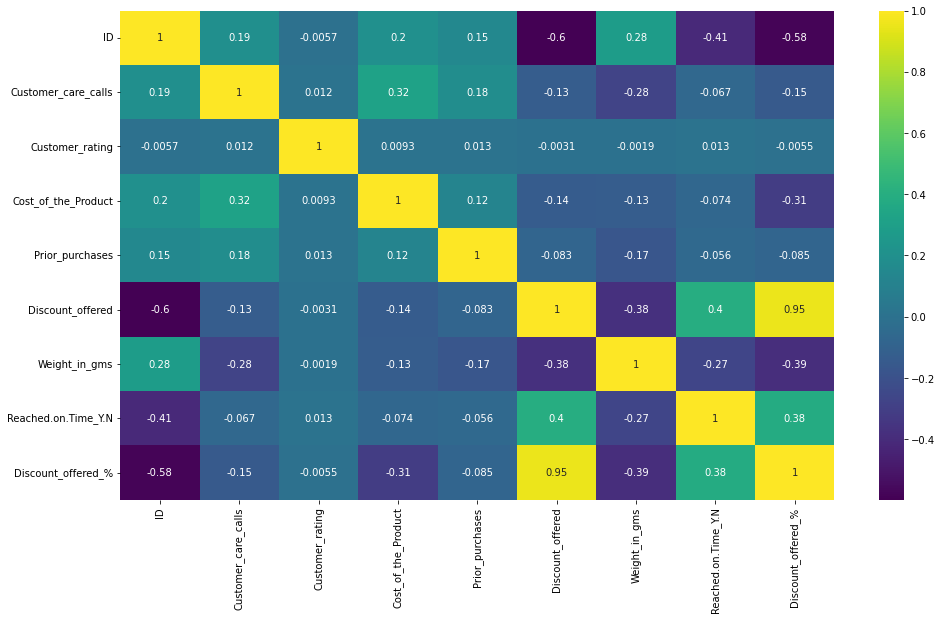

In [15]:
plt.figure(figsize=(16,9))
x = df.drop(['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'],axis = 1)
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

### Now let's try also on the data that has been encoded

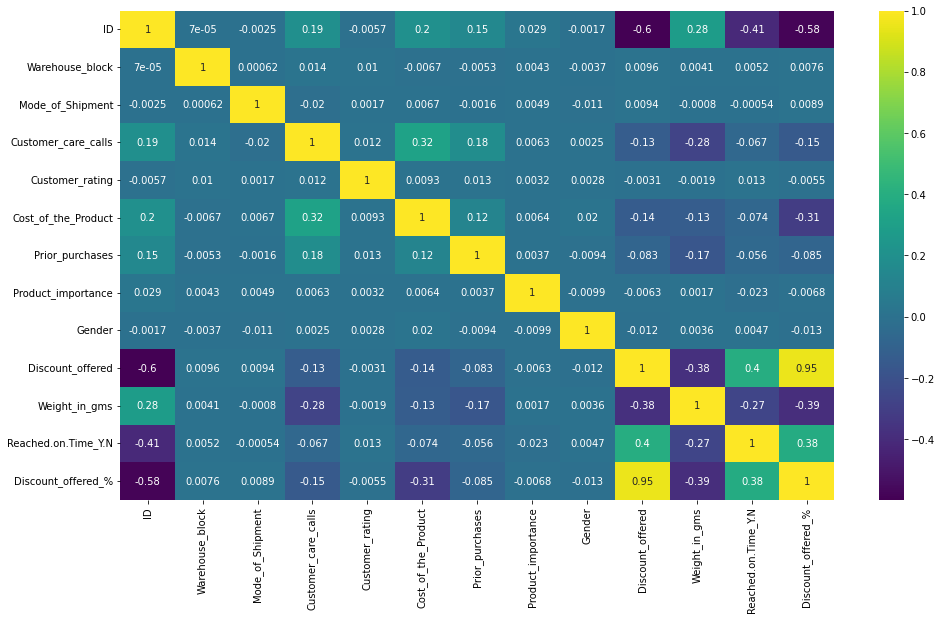

In [16]:
plt.figure(figsize=(16,9))
x = comm
ax = sns.heatmap(comm.corr(),annot = True,cmap = 'viridis')
plt.show()

### It can be seen that each feature in the data does not have a significant correlation in our target column, namely "Reached.on.Time_YN"

### The discount_offered feature has the largest correlation, which is 0.4 in the "Reached.on.Time_YN" feature, but this value does not show a strong enough correlation between the two features.

### There is no high correlation between features other than our additional feature (discount_offered in percentage). I will remove it later so we can avoid multicollinearity problem.

## 2. Basic Visualization

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
 12  Discount_offered_%   10999 non-null  float64
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


## 2.1. Warehouse_block Feature

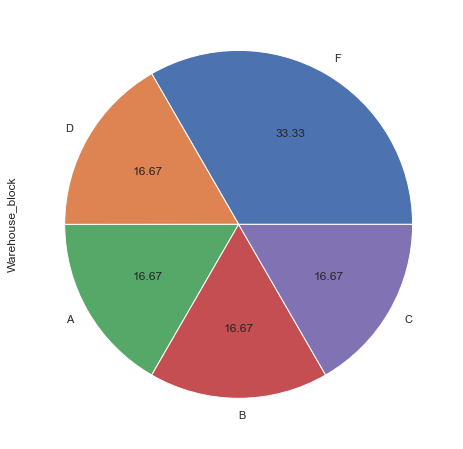

In [18]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Warehouse_block'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<Figure size 1440x576 with 0 Axes>

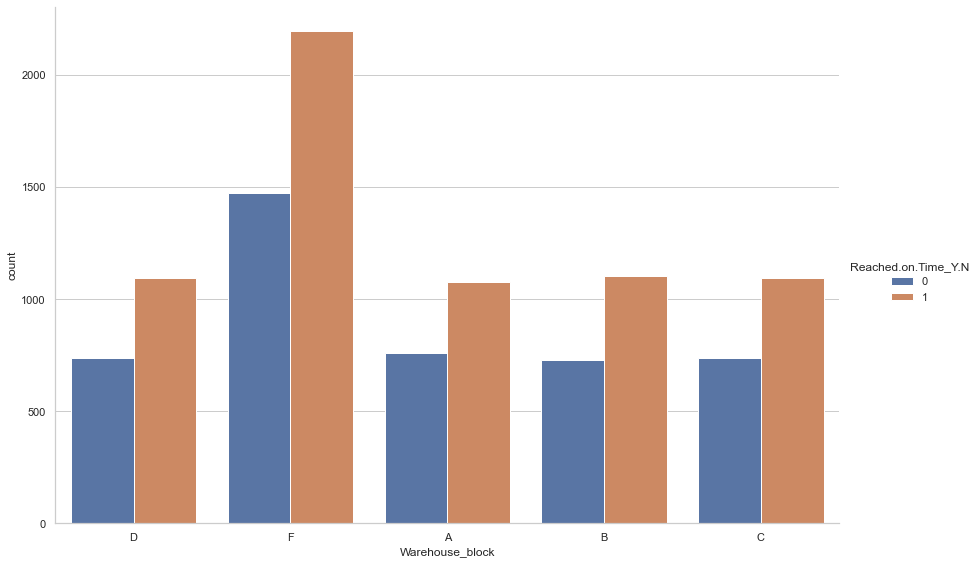

In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Warehouse_block',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

## 2.2. Mode_of_Shipment Feature

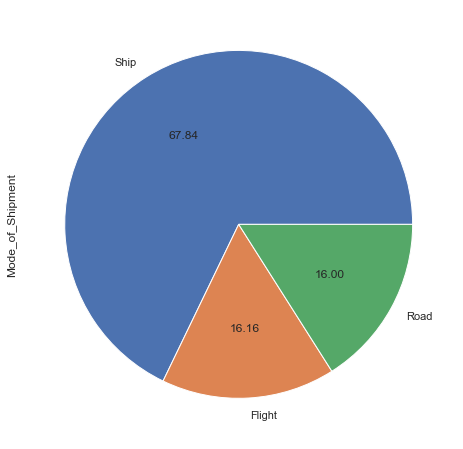

In [20]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Mode_of_Shipment'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<Figure size 1440x576 with 0 Axes>

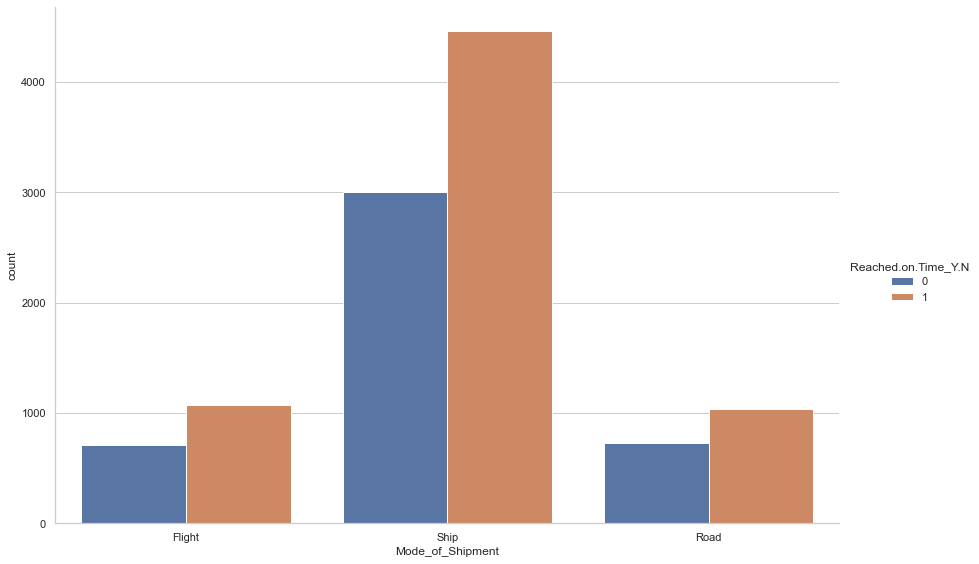

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

## 2.3. Customer_care_calls Feature

<Figure size 1440x576 with 0 Axes>

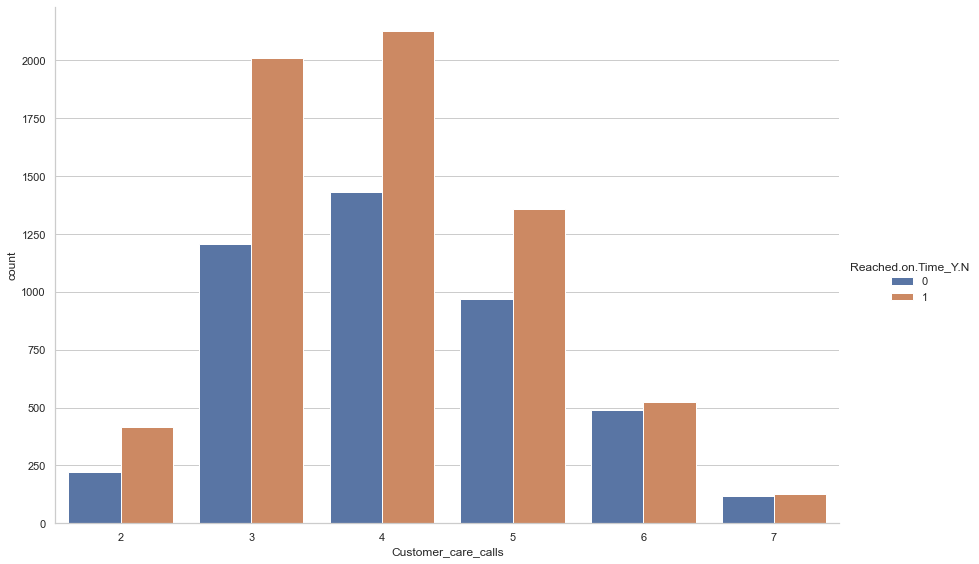

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_care_calls',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)


## 2.4. Customer_rating Feature

<Figure size 1440x576 with 0 Axes>

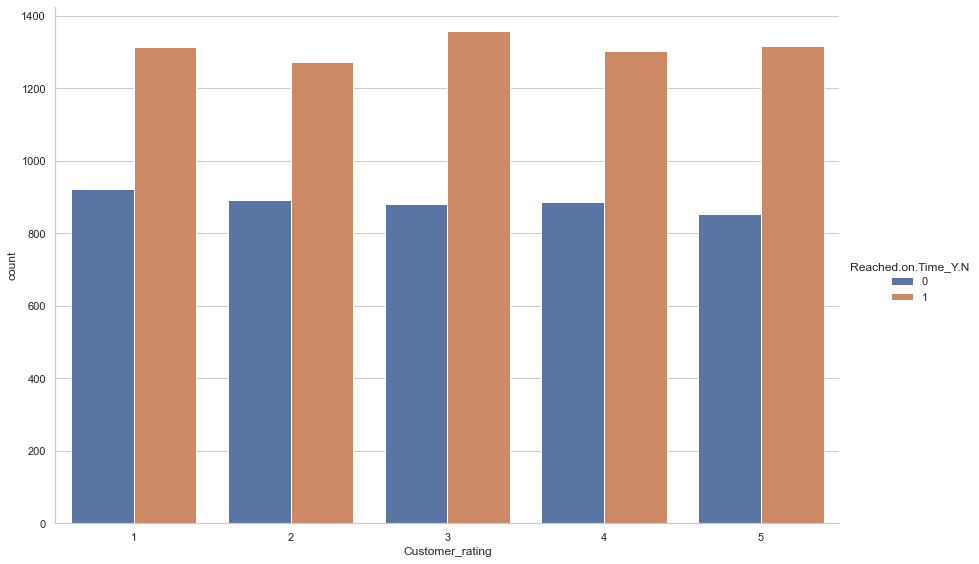

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_rating',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

## 2.5. Cost_of_the_Product Feature

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Count'>

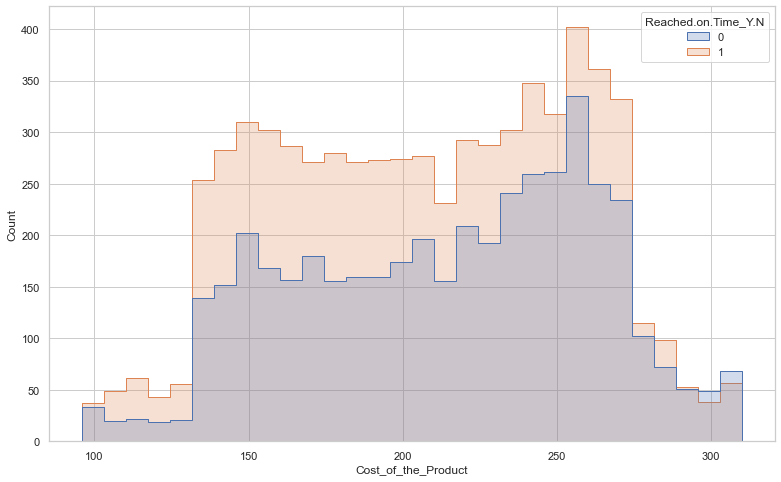

In [24]:
sns.histplot(data=df, x="Cost_of_the_Product",hue="Reached.on.Time_Y.N",element="step")

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Discount_offered'>

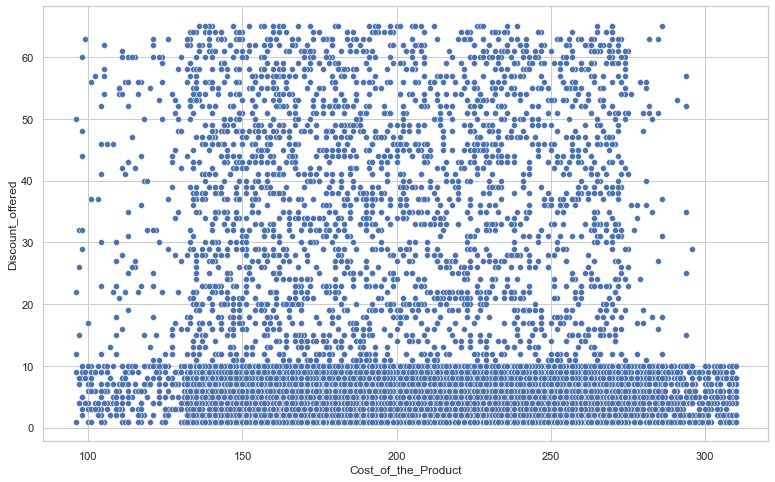

In [25]:
sns.scatterplot(data=df, x="Cost_of_the_Product", y="Discount_offered")

## 2.6. Prior_purchases Feature

<Figure size 1440x576 with 0 Axes>

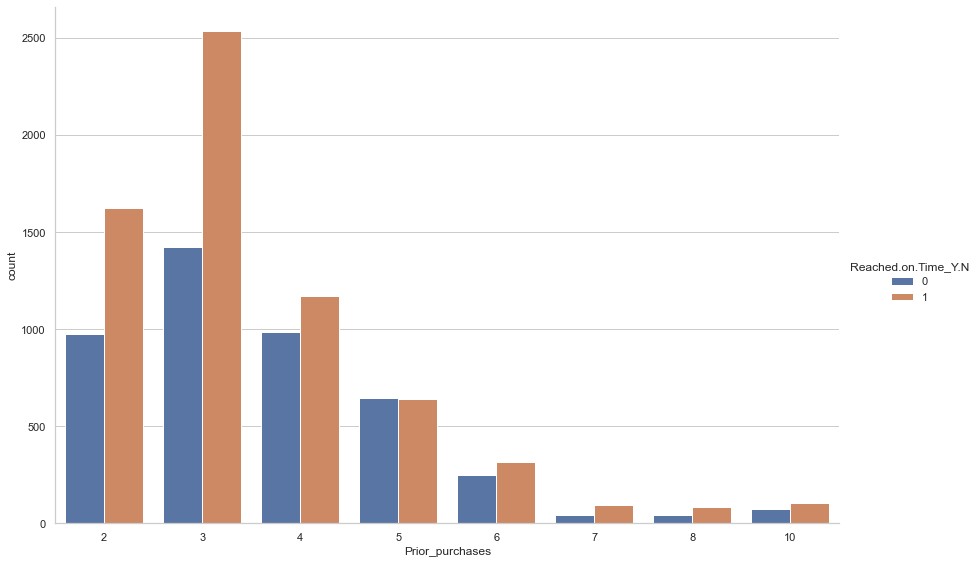

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Prior_purchases',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

## 2.7. Product_importance Feature

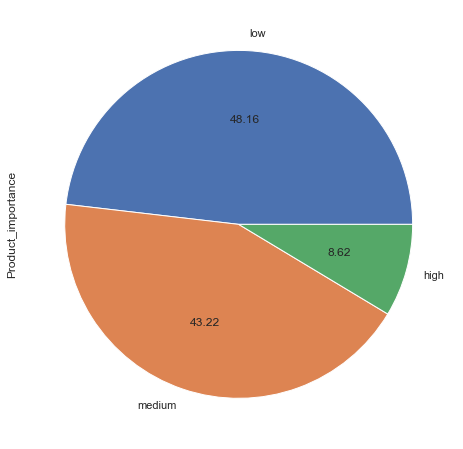

In [27]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Product_importance'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<Figure size 1440x576 with 0 Axes>

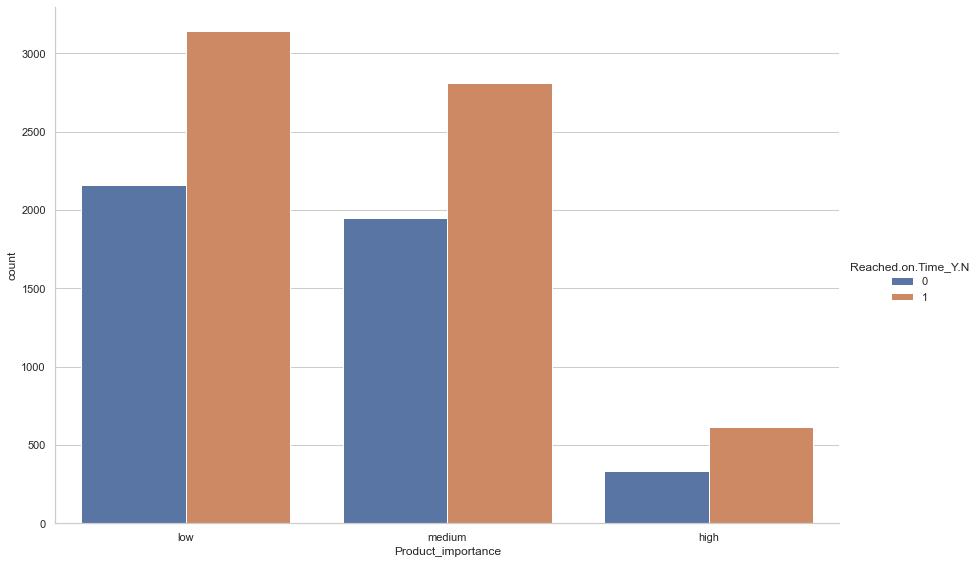

In [28]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Product_importance',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

## 2.8. Gender Feature

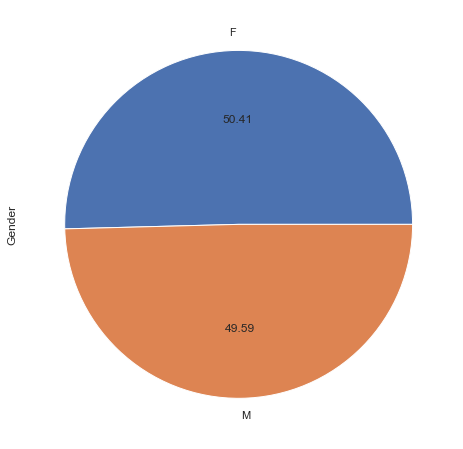

In [29]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<Figure size 1440x576 with 0 Axes>

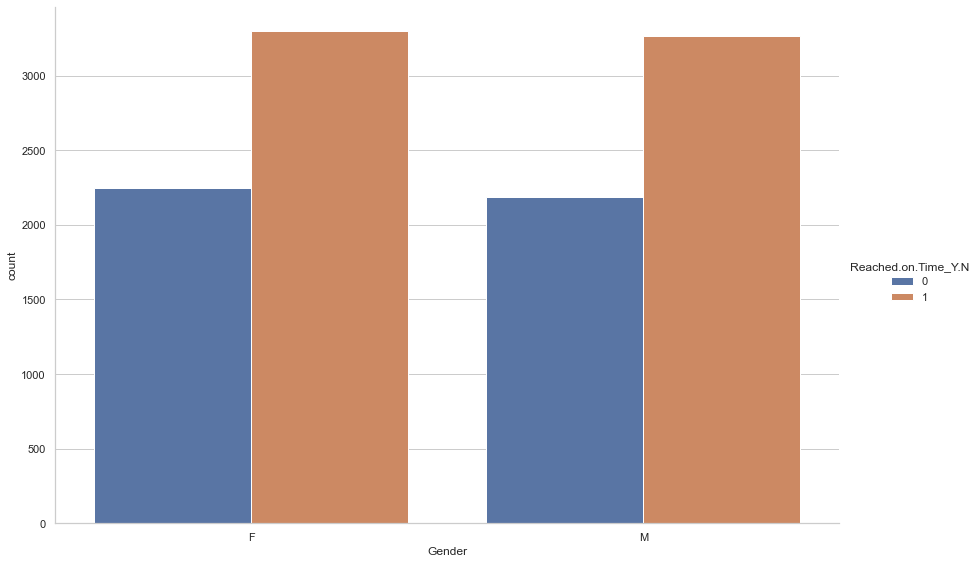

In [30]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Gender',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

## 2.9. Discount_offered Feature

<AxesSubplot:xlabel='Discount_offered', ylabel='Count'>

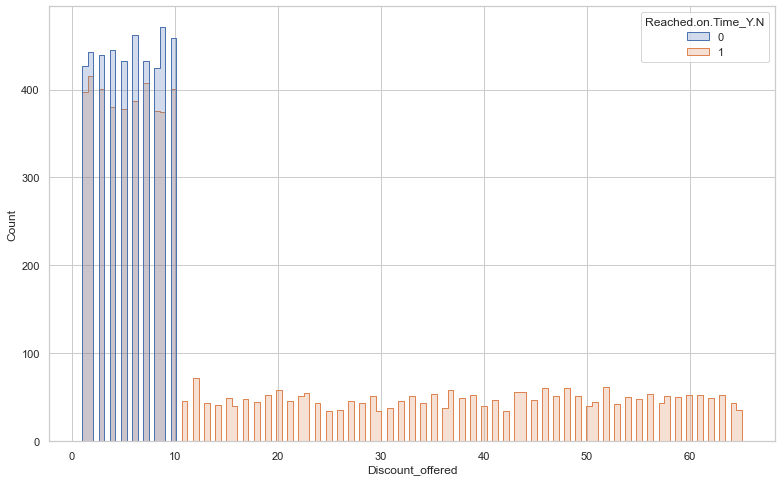

In [31]:
sns.histplot(data=df, x="Discount_offered",hue="Reached.on.Time_Y.N",element="step")

## 2.10. Weight_in_gms Feature

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Count'>

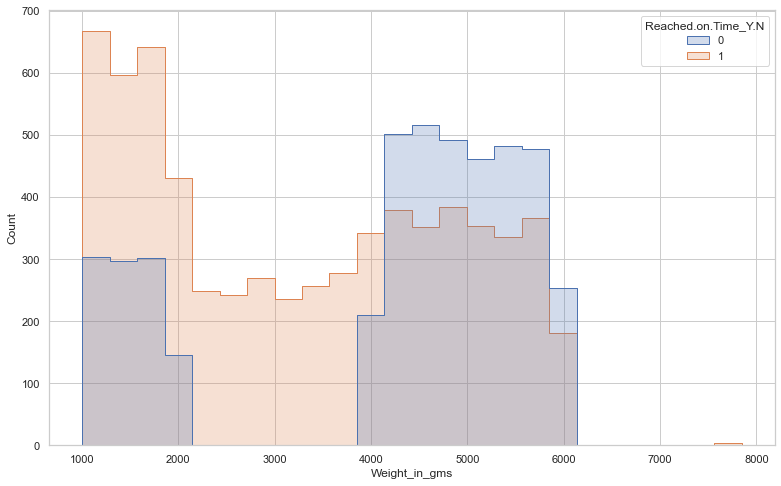

In [32]:
sns.histplot(data=df, x="Weight_in_gms",hue="Reached.on.Time_Y.N",element="step")

## 2.11. Reached on Time Feature

### We want to check how our target data is distributed

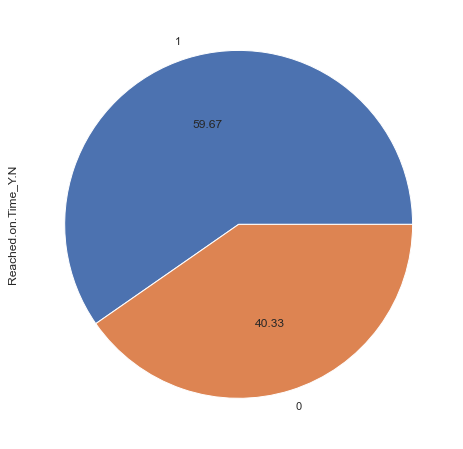

In [33]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Reached.on.Time_Y.N'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

### Like i said before that our target data is a little bit imbalanced. Reached.on.Time_Y.N feature has more negative value (1) than positive value (0).

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
 12  Discount_offered_%   10999 non-null  float64
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


# E. Data Preprocessing

## 1. Removing Unnecessary Feature

In [35]:
df = df.drop(["ID"],axis=1)

In [36]:
df.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Discount_offered_%  
0                44           1233                    1           24.858757  
1                59           3088                    1           27.314815  
2                48           3374                    1           26.229508  
3                10           1177                    1            5.681818  
4                46           2484                    1           25.000000

## 2. Checking For Outlier

In [37]:
df.describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
count     10999.000000      10999.000000   10999.000000         10999.000000   
mean          3.567597         13.373216    3634.016729             0.596691   
std           1.522860         16.205527    1635.377251             0.490584   
min           2.000000          1.000000    1001.000000             0.000000   
25%           3.000000          4.000000    1839.500000             0.000000   
50%           3.000000          7.000000    4149.000000             1.000000   
75%           4.000000         10.000000    5050.000000             1.000000   
max          10.000000         65.000000    7846.000000             1.000000   

       Discount_offered_%  
count        10999.000000  
mean             7.023666  
std              9.268773  
min              0.322581  
25%              1.754386  
50%              3.333333  
75%              6.296459  
max             63.636364

### From the statistical description of the data, the "Weight_in_gms" feature looks a little suspicious, we will check whether there are outliers in these features.

### We check for outliers using the Interquartile Range (IQR).

In [38]:
Q12 = df['Weight_in_gms'].quantile(0.25)
Q32 = df['Weight_in_gms'].quantile(0.75)
IQR = Q32-Q12

In [39]:
df[df['Weight_in_gms']>(Q32+(1.5*IQR))]

Empty DataFrame
Columns: [Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms, Reached.on.Time_Y.N, Discount_offered_%]
Index: []

### It seems that no outliers are detected in the Weight_in_gms data feature

## 3. Encoding

### We have to encode our data so it can be processed in machine learning model

In [40]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [41]:
df_onehot=df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)
    
df_onehot.head()

Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    4                2                  177                3   
1                    4                5                  216                2   
2                    2                2                  183                4   
3                    3                3                  176                4   
4                    2                2                  184                3   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Discount_offered_%  \
0                44           1233                    1           24.858757   
1                59           3088                    1           27.314815   
2                48           3374                    1           26.229508   
3                10           1177                    1            5.681818   
4                46           2484                    1           25.000000   

   Warehouse_block_A  Warehouse_block_B  ...  Warehouse_block_D  \
0                  0                  0  ...                  1   
1                  0                  0  ...                  0   
2                  1                  0  ...                  0   
3                  0                  1  ...                  0   
4                  0                  0  ...                  0   

   Warehouse_block_F  Mode_of_Shipment_Flight  Mode_of_Shipment_Road  \
0                  0                        1                      0   
1                  1                        1                      0   
2                  0                        1                      0   
3                  0                        1                      0   
4                  0                        1                      0   

   Mode_of_Shipment_Ship  Product_importance_high  Product_importance_low  \
0                      0                        0                       1   
1                      0                        0                       1   
2                      0                        0                       1   
3                      0                        0                       0   
4                      0                        0                       0   

   Product_importance_medium  Gender_F  Gender_M  
0                          0         1         0  
1                          0         0         1  
2                          0         0         1  
3                          1         0         1  
4                          1         1         0  

[5 rows x 21 columns]

## 4. Feature Scaling

### We see that our data values have different ranges. We need to do some feature scaling so they have same ranges. We don't want our ML model detects feature that has bigger value range as a dominant feature that impacts more to our target value.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_onehot.drop('Reached.on.Time_Y.N',axis = 1),df_onehot['Reached.on.Time_Y.N'],test_size = 0.2,random_state = 0)



In [43]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [44]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# E. Machine Learning Modelling

# E.1. Basic Models

## 1. K-Nearest Neighbors Model

In [45]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
ypred_knn = knn_model.predict(X_test)
ypred_knn

array([0, 0, 0, ..., 1, 1, 0])

In [47]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       908
           1       0.69      0.66      0.67      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200



In [48]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))

In [49]:
Confusion_Matrix(y_test,ypred_knn)

TN - True Negative 527
FP - False Positive 381
FN - False Negative 443
TP - True Positive 849
Accuracy Rate: 0.6254545454545455
Misclassification Rate: 0.37454545454545457


## 2. Decision Tree Model

In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
ypred_dt = dt_model.predict(X_test)
ypred_dt

array([1, 1, 1, ..., 1, 0, 1])

In [52]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56       908
           1       0.69      0.70      0.69      1292

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [53]:
Confusion_Matrix(y_test,ypred_dt)

TN - True Negative 503
FP - False Positive 405
FN - False Negative 391
TP - True Positive 901
Accuracy Rate: 0.6381818181818182
Misclassification Rate: 0.3618181818181818


## 3. Logistic Regression Model 

In [54]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train,y_train)

LogisticRegression()

In [55]:
ypred_logreg = model_logreg.predict(X_test)
ypred_logreg

array([0, 0, 1, ..., 0, 1, 1])

In [56]:
print(classification_report(y_test,ypred_logreg))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       908
           1       0.69      0.68      0.69      1292

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [57]:
Confusion_Matrix(y_test,ypred_logreg)

TN - True Negative 522
FP - False Positive 386
FN - False Negative 415
TP - True Positive 877
Accuracy Rate: 0.6359090909090909
Misclassification Rate: 0.3640909090909091


## 4. Random Forest Model

In [58]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
ypred_forest = model_forest.predict(X_test)
ypred_forest

array([0, 0, 1, ..., 1, 1, 0])

In [60]:
print(classification_report(y_test,ypred_forest))

              precision    recall  f1-score   support

           0       0.58      0.68      0.62       908
           1       0.74      0.65      0.69      1292

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.66      0.66      2200



In [61]:
Confusion_Matrix(y_test,ypred_forest)

TN - True Negative 616
FP - False Positive 292
FN - False Negative 451
TP - True Positive 841
Accuracy Rate: 0.6622727272727272
Misclassification Rate: 0.3377272727272727


## 5. Extreme Gradient Boosting Model

In [62]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[23:34:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
ypred_xgb = model_xgb.predict(X_test)
ypred_xgb

array([0, 1, 1, ..., 1, 1, 1])

In [64]:
print(classification_report(y_test,ypred_xgb))

              precision    recall  f1-score   support

           0       0.55      0.62      0.59       908
           1       0.71      0.65      0.68      1292

    accuracy                           0.64      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.64      0.64      2200



In [65]:
Confusion_Matrix(y_test,ypred_xgb)

TN - True Negative 565
FP - False Positive 343
FN - False Negative 454
TP - True Positive 838
Accuracy Rate: 0.6377272727272727
Misclassification Rate: 0.36227272727272725


### The accuracy of our model is getting better. But the accuracy we have is still in the range of 60-70%. 

### Now i will try to do oversampling to our data so the target class will be balanced.

# E.2. Models using oversampled data 

## Smote Algorithm

In [66]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
from collections import Counter

In [67]:
X = df_onehot.drop('Reached.on.Time_Y.N',axis = 1)
y = df_onehot['Reached.on.Time_Y.N']

In [68]:
counter = Counter(y)
print(counter)

Counter({1: 6563, 0: 4436})


#### This is our target class proportion before oversampling

In [69]:
# define pipeline
over = SMOTE(sampling_strategy=0.95)
#under = RandomUnderSampler(sampling_strategy=0.7)

steps = [('over', over)] #, ('under', under)
pipeline = Pipeline(steps=steps)

In [70]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter_new = Counter(y)
print(counter_new)

Counter({1: 6563, 0: 6234})


#### This is our target class proportion after oversampling

## Scaling

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [72]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [73]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 1. K-Nearest Neighbors Model (Oversampled data)

In [74]:
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
ypred_knn = knn_model2.predict(X_test)
ypred_knn

array([1, 1, 1, ..., 1, 0, 1])

In [76]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1282
           1       0.68      0.65      0.66      1278

    accuracy                           0.67      2560
   macro avg       0.67      0.67      0.67      2560
weighted avg       0.67      0.67      0.67      2560



In [77]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))

In [78]:
Confusion_Matrix(y_test,ypred_knn)

TN - True Negative 893
FP - False Positive 389
FN - False Negative 453
TP - True Positive 825
Accuracy Rate: 0.67109375
Misclassification Rate: 0.32890625


## 2. Decision Tree Model (Oversampled data)

In [79]:
dt_model2 = DecisionTreeClassifier()
dt_model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
ypred_dt = dt_model2.predict(X_test)
ypred_dt

array([1, 1, 1, ..., 1, 0, 1])

In [81]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1282
           1       0.68      0.69      0.68      1278

    accuracy                           0.68      2560
   macro avg       0.68      0.68      0.68      2560
weighted avg       0.68      0.68      0.68      2560



In [82]:
Confusion_Matrix(y_test,ypred_dt)

TN - True Negative 861
FP - False Positive 421
FN - False Negative 397
TP - True Positive 881
Accuracy Rate: 0.68046875
Misclassification Rate: 0.31953125


## 3. Logistic Regression Model (Oversampled data)

In [83]:
model_logreg2 = LogisticRegression()
model_logreg2.fit(X_train,y_train)

LogisticRegression()

In [84]:
ypred_logreg = model_logreg2.predict(X_test)
ypred_logreg

array([1, 0, 1, ..., 1, 0, 0])

In [85]:
print(classification_report(y_test,ypred_logreg))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1282
           1       0.69      0.69      0.69      1278

    accuracy                           0.69      2560
   macro avg       0.69      0.69      0.69      2560
weighted avg       0.69      0.69      0.69      2560



In [86]:
Confusion_Matrix(y_test,ypred_logreg)

TN - True Negative 883
FP - False Positive 399
FN - False Negative 402
TP - True Positive 876
Accuracy Rate: 0.687109375
Misclassification Rate: 0.312890625


## 4. Random Forest Model (Oversampled data)

In [87]:
model_forest2 = RandomForestClassifier()
model_forest2.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
ypred_forest = model_forest2.predict(X_test)
ypred_forest

array([0, 0, 1, ..., 1, 0, 0])

In [89]:
print(classification_report(y_test,ypred_forest))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1282
           1       0.75      0.61      0.67      1278

    accuracy                           0.70      2560
   macro avg       0.71      0.70      0.70      2560
weighted avg       0.71      0.70      0.70      2560



In [90]:
Confusion_Matrix(y_test,ypred_forest)

TN - True Negative 1014
FP - False Positive 268
FN - False Negative 495
TP - True Positive 783
Accuracy Rate: 0.701953125
Misclassification Rate: 0.298046875


## 5. Extreme Gradient Boosting Model (Oversampled data)

In [91]:
model_xgb2 = XGBClassifier()
model_xgb2.fit(X_train, y_train)

[23:34:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
ypred_xgb = model_xgb2.predict(X_test)
ypred_xgb

array([0, 0, 1, ..., 1, 0, 0])

In [93]:
print(classification_report(y_test,ypred_xgb))

              precision    recall  f1-score   support

           0       0.67      0.76      0.72      1282
           1       0.73      0.63      0.67      1278

    accuracy                           0.70      2560
   macro avg       0.70      0.70      0.69      2560
weighted avg       0.70      0.70      0.69      2560



In [94]:
Confusion_Matrix(y_test,ypred_xgb)

TN - True Negative 980
FP - False Positive 302
FN - False Negative 477
TP - True Positive 801
Accuracy Rate: 0.695703125
Misclassification Rate: 0.304296875


### Now i will try to do some hyperparameter tuning using gridsearch cross validation to search best hyperparameters for our models so that we can get higher accuracy.

# E.3. GridSearch CV Models

## 1. K-Nearest Neighbors GridSearchCV

In [95]:
params_grid = {'n_neighbors': [5,10,15,20], 'weights': ['uniform','distance'],
                     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [96]:
knn_gscv = GridSearchCV(KNeighborsClassifier(), params_grid, cv=5,refit = True, verbose = 3,n_jobs=-1)
knn_gscv.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [97]:
print('Best Parmeters:\n',knn_gscv.best_params_)

Best Parmeters:
 {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [98]:
# View the accuracy score
print('Best score for training data:', knn_gscv.best_score_,"\n") 

Best score for training data: 0.6846731688141182 



In [99]:
final_knn = knn_gscv.best_estimator_
y_pred_knn = final_knn.predict(X_test)
y_pred_knn

array([1, 1, 1, ..., 1, 0, 0])

## 2. Decision Tree GridSearchCV

In [100]:
params_grid_tree = {'criterion': ['gini', 'entropy'], 'splitter': ['best','random'],
                     'max_depth': [1,2,5,7,10,15],'max_leaf_nodes':[2,5,10,15,20]}

In [101]:
tree_gscv = GridSearchCV(DecisionTreeClassifier(), params_grid_tree, cv=5,refit = True, verbose = 3,n_jobs=-1)
tree_gscv.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 7, 10, 15],
                         'max_leaf_nodes': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']},
             verbose=3)

In [102]:
print('Best Parameters:\n',tree_gscv.best_params_)
print('\n')
# View the accuracy score
print('Best score for training data:', tree_gscv.best_score_,"\n") 

Best Parameters:
 {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'splitter': 'best'}


Best score for training data: 0.7249186118404982 



In [103]:
final_tree = tree_gscv.best_estimator_
y_pred_tree = final_tree.predict(X_test)
y_pred_tree

array([0, 0, 1, ..., 1, 0, 0])

## 3. Logistic Regression GridSearchCV

In [104]:
params_grid_logreg = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                     'max_iter': [20,40,50,100,200,1000]}

In [105]:
logreg_gscv = GridSearchCV(LogisticRegression(), params_grid_logreg, cv=5,refit = True, verbose = 3,n_jobs=-1)
logreg_gscv.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase 

/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached w

/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
270 fits failed o

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [20, 40, 50, 100, 200, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [106]:
print('Best Parameters:\n',logreg_gscv.best_params_)
print('\n')
# View the accuracy score
print('Best score for training data:', logreg_gscv.best_score_,"\n") 

Best Parameters:
 {'max_iter': 20, 'penalty': 'l2', 'solver': 'liblinear'}


Best score for training data: 0.688972381457621 



In [107]:
final_logreg = logreg_gscv.best_estimator_
y_pred_logreg = final_logreg.predict(X_test)
y_pred_logreg

array([1, 0, 1, ..., 1, 0, 0])

## 4. Random Forest GridSearchCV

In [108]:
params_grid_forest = {'n_estimators':[50,100,150,200],'criterion': ['gini', 'entropy'], 'max_features': ['auto','sqrt','log2'],
                     'max_depth': [5,7,10,15],'max_leaf_nodes':[5,10,15,20]}

In [109]:
forest_gscv = GridSearchCV(RandomForestClassifier(), params_grid_forest, cv=5,refit = True, verbose = 3,n_jobs=-1)
forest_gscv.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 2/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.693 total time=   1.2s
[CV 4/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.678 total time=   1.0s
[CV 2/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.695 total time=   1.3s
[CV 4/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.670 total time=   1.5s
[CV 4/5] END algorithm=auto, n_neighbors=20, weights=distance;, score=0.681 total time=   0.9s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.676 total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.676 total time=   0.5s
[CV 3/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.686 total time=   0.6s
[CV 2/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;, score=0.699 total time=   0.5s
[CV 4/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;,

[CV 1/5] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.667 total time=   1.0s
[CV 5/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.684 total time=   1.2s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.697 total time=   1.0s
[CV 1/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.673 total time=   1.5s
[CV 4/5] END algorithm=auto, n_neighbors=20, weights=uniform;, score=0.672 total time=   1.2s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.693 total time=   0.5s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.684 total time=   0.5s
[CV 3/5] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.687 total time=   0.5s
[CV 1/5] END algorithm=ball_tree, n_neighbors=15, weights=distance;, score=0.673 total time=   0.5s
[CV 4/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;, score=0.672 total time=   0.5s
[CV 1/5] END algorithm=kd_tree, n

[CV 2/5] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l2, solver=sag;, score=0.702 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.679 total time=   0.8s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.675 total time=   1.0s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.687 total time=   1.4s
[CV 3/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.683 total time=   1.5s
[CV 1/5] END algorithm=auto, n_neighbors=20, weights=distance;, score=0.672 total time=   1.1s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.664 total time=   0.5s
[CV 3/5] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.692 tota

[CV 4/5] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.669 total time=   1.3s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.686 total time=   1.0s
[CV 3/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.686 total time=   1.3s
[CV 5/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.689 total time=   1.4s
[CV 3/5] END algorithm=auto, n_neighbors=20, weights=distance;, score=0.687 total time=   0.9s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.669 total time=   0.5s
[CV 1/5] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.675 total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.669 total time=   0.5s
[CV 2/5] END algorithm=ball_tree, n_neighbors=15, weights=distance;, score=0.690 total time=   0.5s
[CV 5/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;, score=0.677 total time=   0.5s
[CV 3/5] END algorithm=kd_tree, n

[CV 1/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.664 total time=   0.7s
[CV 4/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.667 total time=   1.0s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.694 total time=   1.2s
[CV 5/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.677 total time=   1.6s
[CV 3/5] END algorithm=auto, n_neighbors=20, weights=uniform;, score=0.688 total time=   1.2s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.667 total time=   0.5s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.667 total time=   0.5s
[CV 2/5] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.694 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.677 total time=   0.5s
[CV 3/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;, score=0.688 total time=   0.5s
[CV 2/5] END algorithm=kd_tree, n_

[CV 3/5] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.676 total time=   1.0s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.688 total time=   1.0s
[CV 4/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.669 total time=   1.3s
[CV 2/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.690 total time=   1.6s
[CV 2/5] END algorithm=auto, n_neighbors=20, weights=distance;, score=0.695 total time=   1.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.693 total time=   0.5s
[CV 5/5] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.686 total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.668 total time=   0.5s
[CV 1/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;, score=0.671 total time=   0.6s
[CV 5/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.688 total time=   0.5s
[CV 2/5] END algorithm=kd_tree, 

[CV 5/5] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.677 total time=   1.1s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.692 total time=   1.2s
[CV 4/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.668 total time=   1.3s
[CV 1/5] END algorithm=auto, n_neighbors=20, weights=uniform;, score=0.671 total time=   1.2s
[CV 5/5] END algorithm=auto, n_neighbors=20, weights=uniform;, score=0.677 total time=   1.2s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.677 total time=   0.5s
[CV 2/5] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.688 total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.672 total time=   0.5s
[CV 5/5] END algorithm=ball_tree, n_neighbors=15, weights=distance;, score=0.689 total time=   0.5s
[CV 1/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.672 total time=   0.5s
[CV 1/5] END algorithm=kd_tree, n_n

[CV 2/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=0.692 total time=   0.0s
[CV 5/5] END max_iter=200, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END max_iter=200, penalty=none, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 2/5] END max_iter=200, penalty=none, solver=lbfgs;, score=0.689 total time=   0.0s
[CV 3/5] END max_iter

[CV 1/5] END max_iter=100, penalty=l2, solver=saga;, score=0.676 total time=   0.1s
[CV 2/5] END max_iter=100, penalty=l2, solver=saga;, score=0.691 total time=   0.2s
[CV 3/5] END max_iter=100, penalty=l2, solver=saga;, score=0.693 total time=   0.2s
[CV 4/5] END max_iter=100, penalty=l2, solver=saga;, score=0.682 total time=   0.2s
[CV 5/5] END max_iter=100, penalty=l2, solver=saga;, score=0.702 total time=   0.2s
[CV 1/5] END max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=0.682 total time=   0.0s
[CV 5/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=0.702 total time=   0.0s
[CV 1/5] END max_iter=200, penalty=l2, solver=liblinear;, score=0.676 total time=   0.0s
[CV 2/5] END max_iter=200, penalty=l2, solver=

[CV 2/5] END max_iter=1000, penalty=l2, solver=saga;, score=0.691 total time=   0.1s
[CV 3/5] END max_iter=1000, penalty=l2, solver=saga;, score=0.693 total time=   0.1s
[CV 4/5] END max_iter=1000, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 5/5] END max_iter=1000, penalty=l2, solver=saga;, score=0.702 total time=   0.1s
[CV 1/5] END max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=none, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 1/5] END max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=none, solver=sag;, score=0.682 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=100;, score=0.729 

[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=150;, score=0.731 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=200;, score=0.721 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=150;, score=0.725 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=15, n_estimators=50;, score=0.729 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=15, n_estimators=100;, score=0.730 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=15, n_estimators=150;, score=0.718 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=20, n_estimators=50;, score=0.731 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=20, n_estimators=5

[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=50;, score=0.728 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=100;, score=0.733 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=150;, score=0.730 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=200;, score=0.724 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=15, n_estimators=150;, score=0.725 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=20, n_estimators=50;, score=0.728 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=20, n_estimators=50;, score=0.727 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=20, n_estimators=

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, n_estimators=100;, score=0.729 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, n_estimators=150;, score=0.714 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=10, n_estimators=50;, score=0.730 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=10, n_estimators=50;, score=0.723 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=10, n_estimators=100;, score=0.727 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=10, n_estimators=200;, score=0.719 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=15, n_estimators=100;, score=0.718 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=15, n_estimators=2

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=5, n_estimators=100;, score=0.732 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=5, n_estimators=150;, score=0.724 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=5, n_estimators=200;, score=0.723 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=10, n_estimators=200;, score=0.729 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=15, n_estimators=100;, score=0.730 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=15, n_estimators=150;, score=0.717 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=20, n_estimators=50;, score=0.732 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=20, n_estimators=5

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [110]:
print('Best Parameters:\n',forest_gscv.best_params_)
print('\n')
# View the accuracy score
print('Best score for training data:', forest_gscv.best_score_,"\n") 

Best Parameters:
 {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': 20, 'n_estimators': 100}


Best score for training data: 0.7291194049218368 



In [111]:
final_forest = forest_gscv.best_estimator_
y_pred_forest = final_forest.predict(X_test)
y_pred_forest

array([0, 0, 1, ..., 1, 0, 0])